# PA 2: Classification - Decision Tree

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## Tasks

* Import the libraries and load the dataset (from the csv file)

* Pre-process the dataset and provide a detailed explanation.

* Perform 2 visualizations of the features with respect to target variable with detailed explanation.

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation.

* Split your dataset 75% for training, and 25% for testing the classifier.

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.

* Use comments to explain your code and variable names.

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

* Compare the results of the classifier using gini and entropy

* Print the decision tree visualization with depth of 5

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # to convert qualitative data to quantitative
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics




#importing dataset
df = pd.read_csv('dataset_DT.csv')
print(df.shape)
print()
print('-----------------------------------------------------------------------------------------------')
print(df.columns)
print()
print('-----------------------------------------------------------------------------------------------')
for i in df.columns:
  print(f'{i} : {df[i].value_counts()}')
  print()
  print()
  print('-----------------------------------------------------------------------------------------------')

(18423, 17)

-----------------------------------------------------------------------------------------------
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

-----------------------------------------------------------------------------------------------
age : 32.0    870
33.0    859
31.0    858
34.0    800
35.0    795
       ... 
93.0      2
90.0      2
95.0      2
94.0      1
88.0      1
Name: age, Length: 77, dtype: int64


-----------------------------------------------------------------------------------------------
job : management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: job, dtype: int64


--------------

# **Preprocessing**

There are null values in dataset and also unknown. We will treat unknown values as null and then start with handling null values.

For this purpose we will replace unknown values with null.

Then using 5% rule will drop tuples having null values, which tells that if in a attribute the number of null values are less than 5 % of total dataset then you can drop those tuples.

We can see that only categorical data has null values.

If any attribute has more than 5% and less than 10% null values we will create a new category for them named 'other'.

For attribute who contain more than 10% null values we will fill the null with predicted category on the basis of dataset.

We will need to convert the categorical data to numerical in order to feed to decision tree classifier.

In [ ]:
df['job'].replace('unknown',None,inplace=True)
df['education'].replace('unknown',None,inplace=True)
df['contact'].replace('unknown',None,inplace=True)
df['poutcome'].replace('unknown',None,inplace=True)
df.isna().sum()

age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64

In [ ]:
df.dropna(subset=['month'], inplace=True)
df.dropna(subset=['day'], inplace=True)
df.dropna(subset=['job'], inplace=True)
df.isna().sum()

age              0
job              0
marital          0
education      990
default          0
balance          0
housing          0
loan             0
contact       4142
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     12737
y                0
dtype: int64

In [ ]:
df['education'].fillna('other',inplace = True)
df['contact'].fillna('other',inplace = True)
df.isna().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     12737
y                0
dtype: int64

In [ ]:
df["housing"]=df['housing'].map({'yes':1, 'no':0})
df["loan"]=df['loan'].map({'yes':1, 'no':0})
df["default"]=df['default'].map({'yes':1, 'no':0})
df["y"]=df['y'].map({'yes':1, 'no':0})

df["poutcome"]=df['poutcome'].map({'success':1, 'failure':0})

df["job"]=df['job'].map({'blue-collar':0, 'management':1,
                         'services':2, 'retired':3,
                         'technician':4, 'admin.':5,
                         'self-employed':6, 'student':7,
                         'entrepreneur':8, 'unemployed':9,
                         'housemaid':10, 'failure':11})

df["month"]=df['month'].map({'jan':0, 'feb':1,
                         'mar':2, 'apr':3,
                         'may':4, 'jun':5,
                         'jul':6, 'aug':7,
                         'sep':8, 'oct':9,
                         'nov':10, 'dec':11})
df["marital"]=df['marital'].map({'single':1, 'married':0, 'divorced':2 })
df["education"]=df['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'other':3 })
df["contact"]=df['contact'].map({'telephone':0, 'cellular':1, 'other':2 })
for i in df.columns:
  print(f'{i} : {df[i].value_counts()}')
  print()
  print()
  print('-----------------------------------------------------------------------------------------------')

age : 32.0    840
31.0    831
33.0    828
35.0    775
34.0    765
       ... 
95.0      2
90.0      2
92.0      2
94.0      1
88.0      1
Name: age, Length: 77, dtype: int64


-----------------------------------------------------------------------------------------------
job : 1     3949
0     3604
4     2861
5     1926
2     1531
3     1140
6      651
8      572
9      538
7      480
10     449
Name: job, dtype: int64


-----------------------------------------------------------------------------------------------
marital : 0    10287
1     5435
2     1979
Name: marital, dtype: int64


-----------------------------------------------------------------------------------------------
education : 1    8685
2    5575
0    2451
3     990
Name: education, dtype: int64


-----------------------------------------------------------------------------------------------
default : 0    17513
1      188
Name: default, dtype: int64


--------------------------------------------------------------------

In [ ]:
df['poutcome'].fillna('other',inplace=True)

In [ ]:
df_temp = df[df['poutcome'] != 'other']
df_temp_x = pd.concat((df_temp.iloc[:,0:15],df_temp.iloc[:,16]),axis=1)
df_temp_y = df_temp['poutcome'].astype('int')


x_train, x_test, y_train, y_test = train_test_split(df_temp_x,df_temp_y, train_size=0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

tree.fit(x_train, y_train)
df_temp.reset_index()
df_final=df[df['poutcome']=='other']


df_final_x=pd.concat((df_final.iloc[:,0:15],df_final.iloc[:,16]),axis=1)
df_final_x.reset_index()

df_final_y=pd.concat((df_temp_y,pd.Series(tree.predict(df_final_x))),axis=0).reset_index()[0]
df_final_z=pd.concat((df_temp_x,df_final_x),axis=0).reset_index()
df_final = pd.concat((df_final_z,df_final_y),axis=1)
df_final.isna().sum()

index        0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
0            0
dtype: int64

In [ ]:
df_final=df_final.rename(columns={0: 'poutcome'}).iloc[:,1:]
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,poutcome
0,49.0,1,2,2,0,20727.0,0,0,1,1.0,3,285.0,3.0,132.0,2.0,0,0
1,54.0,3,0,1,0,1004.0,1,0,1,1.0,3,479.0,1.0,307.0,1.0,0,0
2,32.0,4,1,2,0,392.0,1,0,1,1.0,3,957.0,2.0,131.0,2.0,0,0
3,46.0,6,2,2,0,926.0,1,0,1,1.0,3,463.0,1.0,133.0,3.0,0,0
4,39.0,4,2,1,0,688.0,1,1,1,1.0,3,233.0,2.0,133.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,74.0,3,0,0,0,4286.0,0,0,1,30.0,8,195.0,1.0,-1.0,0.0,0,0
17697,41.0,4,0,1,0,2152.0,0,0,1,30.0,8,134.0,1.0,121.0,1.0,0,0
17698,57.0,1,0,3,0,0.0,0,0,1,30.0,8,585.0,1.0,-1.0,0.0,0,0
17699,38.0,4,1,1,0,1711.0,0,0,0,30.0,8,234.0,1.0,-1.0,0.0,1,1


# **Feature Visualization**

Conclusion: Groups of retirees, singles, and individuals with higher education frequently subscribe to term deposits.

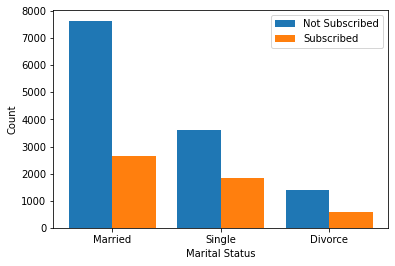

In [ ]:
m = pd.crosstab(df_final['marital'],df_final['y'])
X = ['Married','Single','Divorce']


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, m[0], 0.4, label = 'Not Subscribed')
plt.bar(X_axis + 0.2, m[1], 0.4, label = 'Subscribed')

plt.xticks(X_axis, X)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend()
plt.show()

The graph above shows that the majority of consumers (7644) who have married will not sign up for a term deposit plan. On the other hand, compared to single customers (1827) and divorced customers(595), the number of customers who have subscribed to a term deposit in a married status is likewise the greatest (2643).

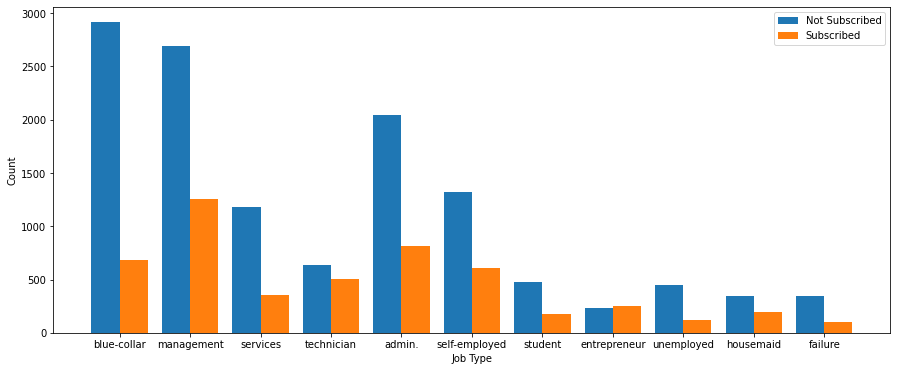

In [ ]:
plt.figure(figsize=(15,6))
m = pd.crosstab(df_final['job'],df_final['y'])
X = ['blue-collar','management','services','technician','admin.','self-employed','student','entrepreneur','unemployed','housemaid','failure']


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, m[0], 0.4, label = 'Not Subscribed')
plt.bar(X_axis + 0.2, m[1], 0.4, label = 'Subscribed')

plt.xticks(X_axis, X)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.legend()
plt.show()

The subscribed and not subscribe customers will be categorized according to their job. According to the graph above, the highest number of customers who do not subscribe the term deposit are from 'blue-collar' job (2916) followed by management job (2692).

While for subscribed customers, the highest number of job is management(1257) followed by admin (816).

# **Determining Influential Attributes**
Finding the best set of features that enables the construction of optimized models of the phenomena being examined is the aim of feature selection approaches used in machine learning.

**Correlation Coefficient:**

Good variables have a strong correlation with the target, which is the justification for utilizing correlation in feature selection. Variables should also be uncorrelated among themselves but correlated with the target.

We can anticipate one variable from another if the two are correlated. As the second feature does not provide any new information, the model just requires one connected feature.


<Axes: >

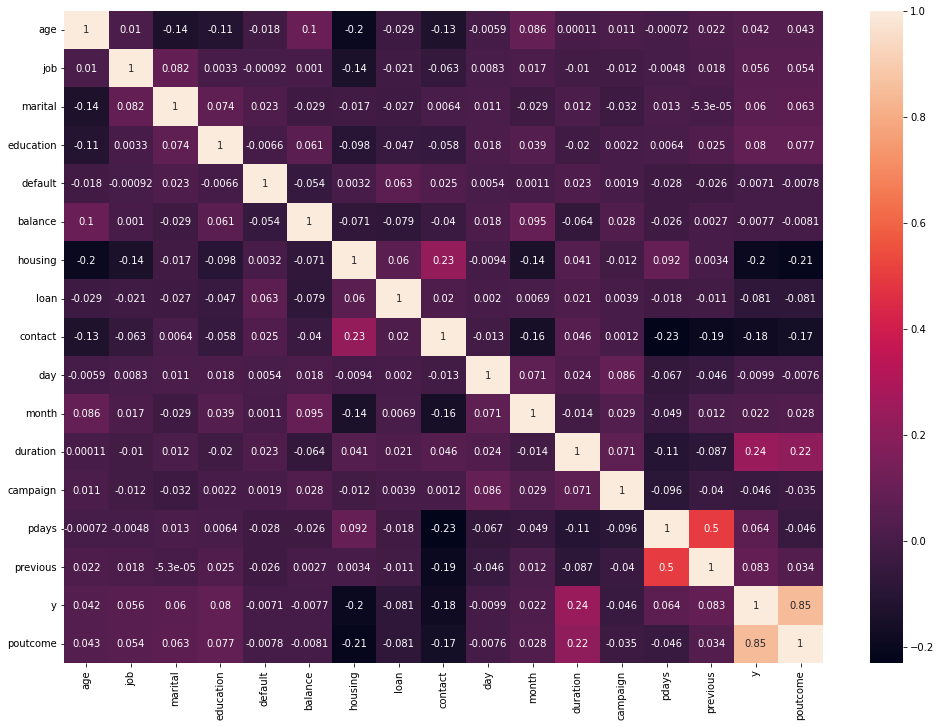

In [ ]:
ccm = df_final.corr()
plt.figure(figsize=(17,12))
sns.heatmap(ccm,annot=True)

Hence from the plot we can see with y most positively correlated attribute is **poutcome**.

The others are:
2. duration  : its duration of last contact
3. previous : its previous number of contacts performed before the campaign
4. education : It has 4 values, primary, secondary, tertiary and other
5. pdays : number of days passed after the last contact from previous campaign
6. marital : is the person single, married or divorced?



# **Splitting Dataset into training and testing**
This can be done using train_test_split() method.

In [ ]:
x = pd.concat((df_final['age'],df_final['job'],df_final['marital'],df_final['education'],df_final['default'],df_final['balance'],df_final['housing'],df_final['loan'],df_final['contact'],df_final['day'],df_final['month'],df_final['duration'],df_final['campaign'],df_final['pdays'],df_final['poutcome']),axis=1)
y = df_final['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=24)

# **Hyperparameter Tuning using Randomized Search**

We do this to find best set of hyperparameters for our classifiers and play around with max_depth and min_samples_leaf parameters.

In [ ]:
max_depth = list(range(1, 50))
min_samples_leaf = list(range(1, 60))
min_samples_split = list(range(2,50))
max_features = list(range(1, x_train.shape[1]))
criterion = ['entropy' , 'gini']


dt_model = DecisionTreeClassifier()

#carry out randomized search
parameter_grid = dict(criterion=criterion,
                      max_features=max_features,
                      min_samples_leaf=min_samples_leaf,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split)

grid = RandomizedSearchCV(estimator=dt_model, param_distributions=parameter_grid)
grid.fit(x_train,y_train)

print("Best criterion ：" , grid.best_estimator_.criterion)
print("Best max_features" , grid.best_estimator_.max_features)
print("Best min_samples_leaf : " , grid.best_estimator_.min_samples_leaf)
print("Best max_depth : " , grid.best_estimator_.max_depth )
print("Best min_samples_split : " , grid.best_estimator_.min_samples_split)

Best criterion ： entropy
Best max_features 7
Best min_samples_leaf :  16
Best max_depth :  5
Best min_samples_split :  31


In [ ]:
#using gini
dt_model = DecisionTreeClassifier(criterion='gini',
                      max_features=10,
                      min_samples_leaf=49,
                      max_depth=7,
                      min_samples_split=35,
                      random_state = 50
                      )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=10, min_samples_leaf=49,
                       min_samples_split=35, random_state=50)

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_model.score(x_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.940


In [ ]:
#using entropy
dt_model2 = DecisionTreeClassifier(criterion='entropy',
                      max_features=10,
                      min_samples_leaf=49,
                      max_depth=7,
                      min_samples_split=35,
                      random_state = 50
                      )
dt_model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       min_samples_leaf=49, min_samples_split=35,
                       random_state=50)

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt_model2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt_model2.score(x_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.945


# **Confusion Matrix and Classification Report**

It is a table that is utilized in categorization issues to determine where model errors occurred.

The rows correspond to the actual classes for which the results were intended. The predictions we've made are represented by the columns. This table makes it simple to identify whose predictions were incorrect.

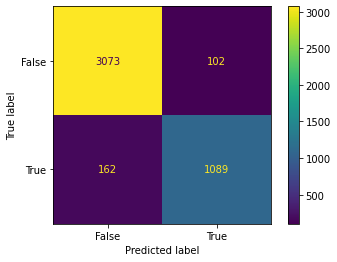

Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3175
           1       0.91      0.87      0.89      1251

    accuracy                           0.94      4426
   macro avg       0.93      0.92      0.93      4426
weighted avg       0.94      0.94      0.94      4426



In [ ]:
#Gini
y_pred = dt_model.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

print("Report")
print(metrics.classification_report(y_test, y_pred))

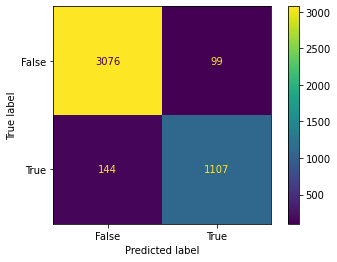

Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3175
           1       0.92      0.88      0.90      1251

    accuracy                           0.95      4426
   macro avg       0.94      0.93      0.93      4426
weighted avg       0.94      0.95      0.94      4426



In [ ]:
# Entropy
y_pred = dt_model2.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

print("Report")
print(metrics.classification_report(y_test, y_pred))

# **Comparison of gini and entropy**

From above figures we can see that with use of entropy our model works slightly nice than gini by(0.01)

We conclude this by using f1-score, accuracy and weighted avg value of both.

# **Visualisation of Decision Tree with depth 5**

In [ ]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

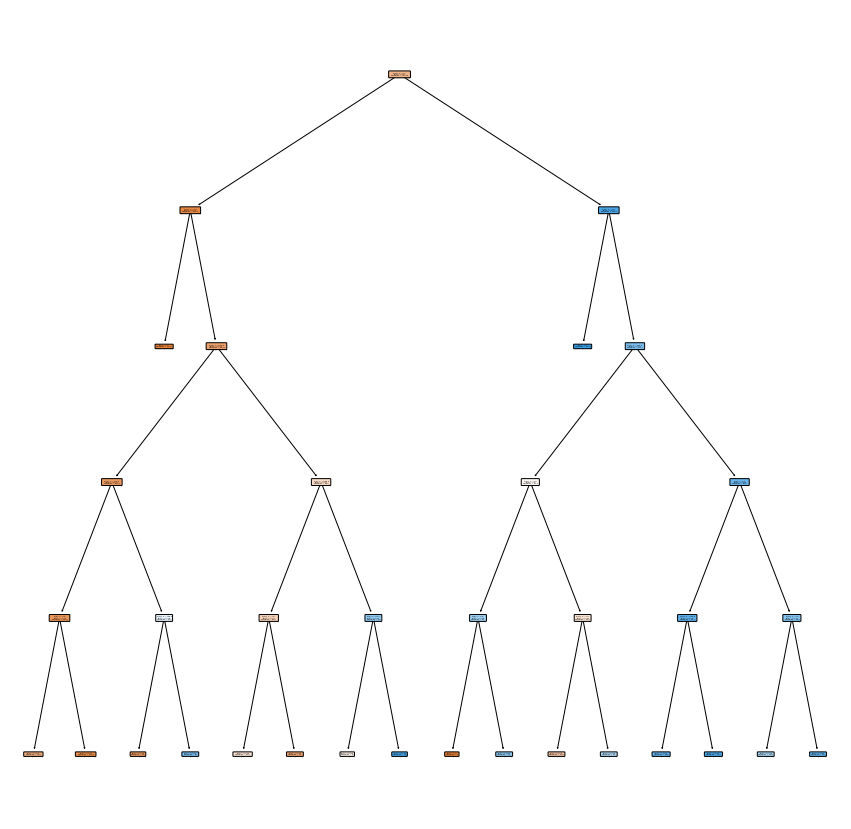

In [ ]:
plot_tree(clf, filled=True, rounded=True)
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.savefig('tree_visualization.png',dpi=100)

# **Reference**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://matplotlib.org/cheatsheets/